In [2]:
# libraries
library(tidyverse)
library(ggplot2)
library(moonBook)
require(gridExtra)
library(ggplot2)
library(gridExtra)
library(grid)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.0
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: gridExtra


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [3]:
getwd()

[1] "/gpfs/group/home/salee/Staining_spatial"

In [4]:
setwd("/gpfs/group/home/salee/Staining_spatial/")

# Input file

In [5]:
df_ihc <- read.csv("Spatial_staining.csv", header=TRUE)

In [6]:
df_ihc <- df_ihc %>% mutate(ID.block=ifelse(Block.number=="TMA-PR79-1",1,2))

In [7]:
df_ihc <- df_ihc %>% mutate(key=paste(ID.block, Core.number, sep="_" ))

In [8]:
d_anno <- read.csv("/gpfs/group/home/salee/Spatial_CMP/R.Annotation_20220915.csv", header=TRUE)

### join annotation file to ihc file

In [9]:
d_join <- left_join(d_anno, df_ihc,  by=c('ID.block.core'='key'))

In [10]:
names(df_ihc[1])

[1] "Block.number"

### select core information 

In [11]:
d_join_2<- d_join %>% select(ID.block.core, PLVAP_S, PLVAP_R, ACKR1_S, ACKR1_R, CCL14_S, CCL14_R, CCL14.Hscore.endothelial.cells, CCL14.Hscore.cardiomyocytes, 
                           SLC6A6.Hscore.cardiomyocytes, RRAD.Hscore.cardiomyocytes, IGF2BP2.Hscore.cardiomyocytes, UCHL1.Hscore.cardiomyocytes, MYOM1.Hscore.cardiomyocytes
                           # clinical information
                           , Clinical_phenotype_path, Clinical_phenotype_LV
                           # histologic information
                           , P_Degeneration, P_Hypertrophy, P_Disarray, P_Fibrosis, P_Normal
                           # Others
                           , Ventricle, Operation, Fixation.interval, Gender, Age, Institute)

In [12]:
d_join_3<-d_join_2[!duplicated(d_join_2$ID.block.core), ] 

In [13]:
d_join_3 <- d_join_3 %>% mutate(ClinicalNHist_Control2 = ifelse(Clinical_phenotype_LV == "Control", "Control_Clin", 
                                                     ifelse(P_Normal == "1" & Clinical_phenotype_LV != "Control", "Control_His", 
                                                            ifelse(Clinical_phenotype_LV == "NES_HCMP", "Diseased_NES", "Diseased_ES")))
                      )
 

In [14]:
d_join_3 <- d_join_3 %>% mutate(PLVAP_sum = PLVAP_S + PLVAP_R)  %>% mutate(ACKR1_sum = ACKR1_S + ACKR1_R) %>% mutate(CCL14_sum = CCL14_S + CCL14_R)


In [15]:
d_join_3 <-d_join_3 %>% mutate(P_Fib3 = ifelse(P_Fibrosis==3, 2, P_Fibrosis)) %>% mutate(P_Deg3 = ifelse(P_Degeneration==3,2, P_Degeneration))


In [16]:
select=sapply(d_join_3, function(x) length(unique(x))<=5)

d_join_3[,select]<-lapply(d_join_3[select], factor)

# PLVAP, ACKR1, CCL14

In [17]:
d_join_4<- d_join_3 %>% select(-c(CCL14.Hscore.endothelial.cells, CCL14.Hscore.cardiomyocytes, 
                           SLC6A6.Hscore.cardiomyocytes, RRAD.Hscore.cardiomyocytes, IGF2BP2.Hscore.cardiomyocytes, UCHL1.Hscore.cardiomyocytes, MYOM1.Hscore.cardiomyocytes)
                               )

In [18]:
d_join_5<-d_join_4 %>%drop_na()

### Fibrosis all category

In [19]:
mytable(P_Fibrosis~PLVAP_S+PLVAP_R+PLVAP_sum+ACKR1_S+ACKR1_R+ACKR1_sum+CCL14_S+CCL14_R+CCL14_sum, data=d_join_5)


           Descriptive Statistics by 'P_Fibrosis'          
____________________________________________________________ 
               0          1          2          3        p  
             (N=53)     (N=27)     (N=6)      (N=2)   
------------------------------------------------------------ 
 PLVAP_S                                               0.004
   - 0     29 (54.7%) 6 (22.2%)  2 (33.3%)   0 ( 0.0%)      
   - 1     18 (34.0%) 13 (48.1%) 1 (16.7%)   0 ( 0.0%)      
   - 2     6 (11.3%)  8 (29.6%)  3 (50.0%)  2 (100.0%)      
 PLVAP_R                                               0.001
   - 0     29 (54.7%) 6 (22.2%)  2 (33.3%)   0 ( 0.0%)      
   - 1     23 (43.4%) 15 (55.6%) 1 (16.7%)  1 (50.0%)       
   - 2     1 ( 1.9%)  6 (22.2%)  3 (50.0%)  1 (50.0%)       
 PLVAP_sum                                             0.002
   - 0     29 (54.7%) 6 (22.2%)  2 (33.3%)   0 ( 0.0%)      
   - 2     18 (34.0%) 10 (37.0%)  0 ( 0.0%)  0 ( 0.0%)      
   - 3     5 ( 9.4%)  8 (29.

### Fibrosis 0-2

In [20]:
mytable(P_Fib3~PLVAP_S+PLVAP_R+PLVAP_sum+ACKR1_S+ACKR1_R+ACKR1_sum+CCL14_S+CCL14_R+CCL14_sum, data=d_join_5)


       Descriptive Statistics by 'P_Fib3'       
_________________________________________________ 
               0          1          2        p  
             (N=53)     (N=27)     (N=8)   
------------------------------------------------- 
 PLVAP_S                                    0.002
   - 0     29 (54.7%) 6 (22.2%)  2 (25.0%)       
   - 1     18 (34.0%) 13 (48.1%) 1 (12.5%)       
   - 2     6 (11.3%)  8 (29.6%)  5 (62.5%)       
 PLVAP_R                                    0.000
   - 0     29 (54.7%) 6 (22.2%)  2 (25.0%)       
   - 1     23 (43.4%) 15 (55.6%) 2 (25.0%)       
   - 2     1 ( 1.9%)  6 (22.2%)  4 (50.0%)       
 PLVAP_sum                                  0.000
   - 0     29 (54.7%) 6 (22.2%)  2 (25.0%)       
   - 2     18 (34.0%) 10 (37.0%)  0 ( 0.0%)      
   - 3     5 ( 9.4%)  8 (29.6%)  3 (37.5%)       
   - 4     1 ( 1.9%)  3 (11.1%)  3 (37.5%)       
 ACKR1_S                                    0.001
   - 0     28 (52.8%) 5 (18.5%)  1 (12.5%)       
   -

In [21]:
options(repr.plot.width=18, repr.plot.height=5)

## Figure 5G

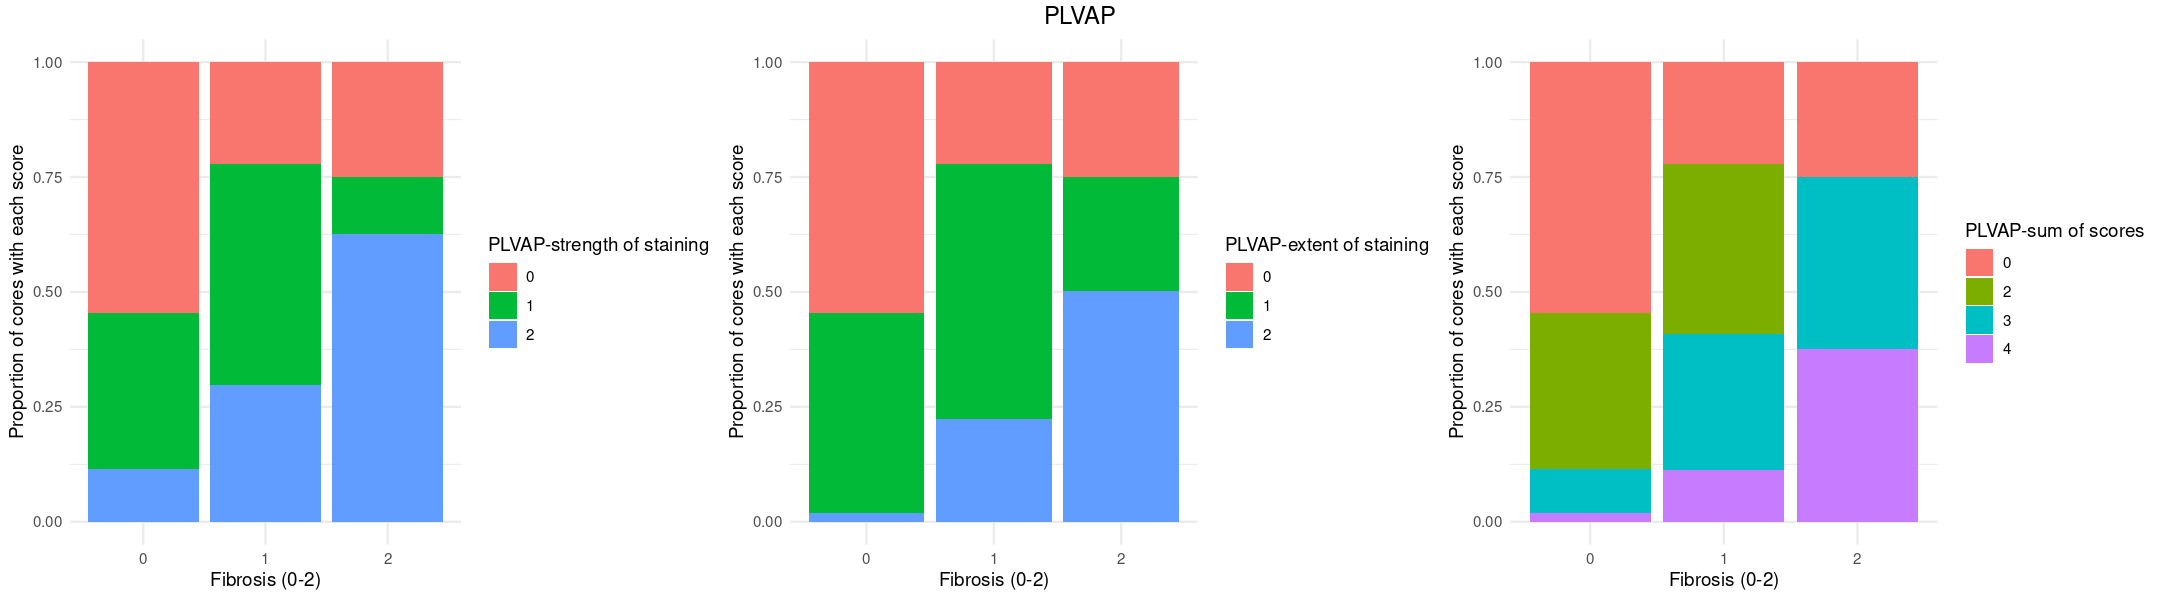

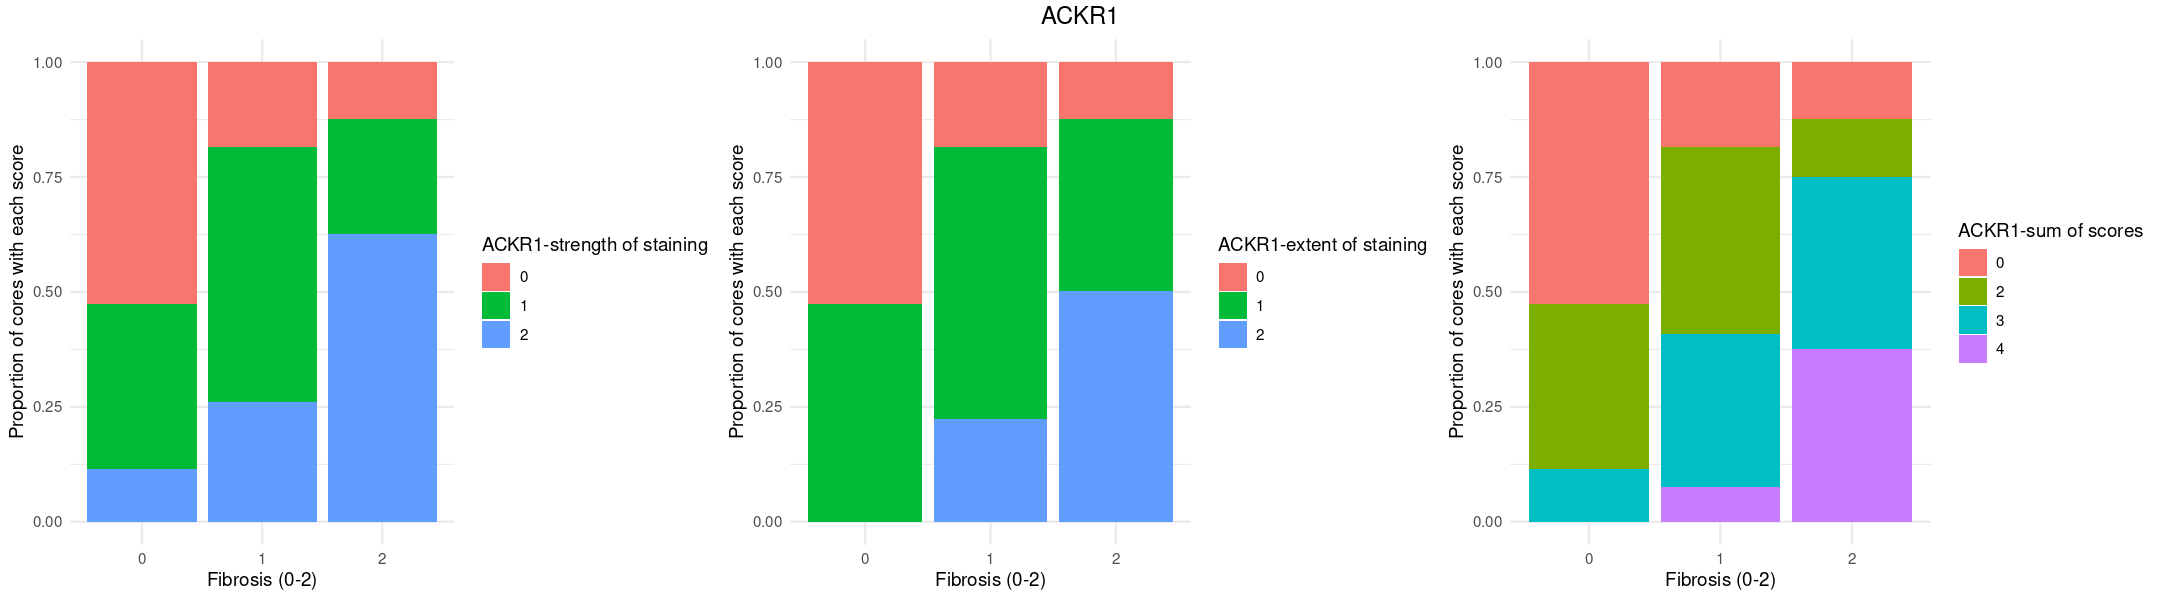

In [22]:

p1<- ggplot(data=d_join_5) + 
geom_bar(
    mapping = aes(x = P_Fib3, fill = PLVAP_S), 
    position= "fill"
    ) +
    labs(x="Fibrosis (0-2)", y="Proportion of cores with each score",
        theme(axis.title.x = element_text(size = rel(1), angle = 00)) +
        theme(axis.title.y = element_text(size = rel(1), angle = 00))
         )+ theme_minimal()+
    scale_fill_discrete(name = "PLVAP-strength of staining")

p2 <- ggplot(data=d_join_5) + 
geom_bar(
    mapping = aes(x = P_Fib3, fill = PLVAP_R), 
    position= "fill"
    ) +
    labs(x="Fibrosis (0-2)", y="Proportion of cores with each score",
        theme(axis.title.x = element_text(size = rel(1), angle = 00)) +
        theme(axis.title.y = element_text(size = rel(1), angle = 00))
         )+ theme_minimal()+
    scale_fill_discrete(name = "PLVAP-extent of staining")


p5 <- ggplot(data=d_join_5) + 
geom_bar(
    mapping = aes(x = P_Fib3, fill = PLVAP_sum), 
    position= "fill"
    ) +
    labs(x="Fibrosis (0-2)", y="Proportion of cores with each score",
        theme(axis.title.x = element_text(size = rel(1), angle = 00)) +
        theme(axis.title.y = element_text(size = rel(1), angle = 00))
         )+ theme_minimal()+
    scale_fill_discrete(name = "PLVAP-sum of scores")


p3 <- ggplot(data=d_join_5) + 
geom_bar(
    mapping = aes(x = P_Fib3, fill = ACKR1_S), 
    position= "fill"
    )+
    labs(x="Fibrosis (0-2)", y="Proportion of cores with each score",
        theme(axis.title.x = element_text(size = rel(1), angle = 00)) +
        theme(axis.title.y = element_text(size = rel(1), angle = 00))
         )+ theme_minimal()+
    scale_fill_discrete(name = "ACKR1-strength of staining")

p4 <- ggplot(data=d_join_5) + 
geom_bar(
    mapping = aes(x = P_Fib3, fill = ACKR1_R), 
    position= "fill"
    )+
    labs(x="Fibrosis (0-2)", y="Proportion of cores with each score",
        theme(axis.title.x = element_text(size = rel(1), angle = 00)) +
        theme(axis.title.y = element_text(size = rel(1), angle = 00))
         )+ theme_minimal()+
    scale_fill_discrete(name = "ACKR1-extent of staining")

p6 <- ggplot(data=d_join_5) + 
geom_bar(
    mapping = aes(x = P_Fib3, fill = ACKR1_sum), 
    position= "fill"
    ) +
    labs(x="Fibrosis (0-2)", y="Proportion of cores with each score",
        theme(axis.title.x = element_text(size = rel(1), angle = 00)) +
        theme(axis.title.y = element_text(size = rel(1), angle = 00))
         ) + theme_minimal() +
    scale_fill_discrete(name = "ACKR1-sum of scores")

grid.arrange(p1, p2, p5, ncol=3, top=textGrob("PLVAP", gp=gpar(fontsize=14)))
grid.arrange(p3, p4, p6, ncol=3, top=textGrob("ACKR1", gp=gpar(fontsize=14)))

In [23]:
options(repr.plot.width=18, repr.plot.height=5)

## Suppl 3B

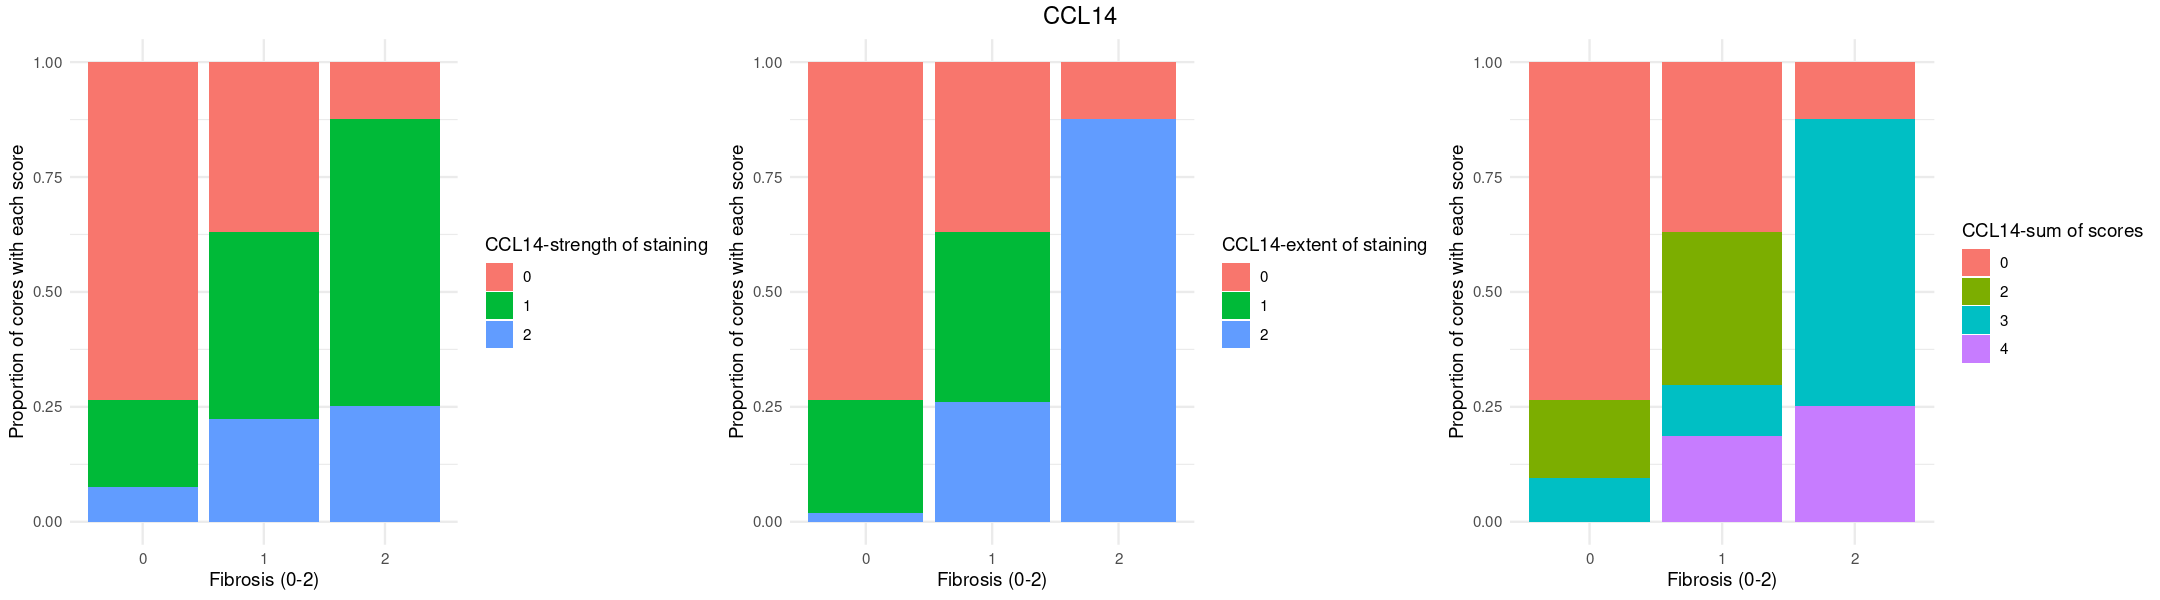

In [24]:

p1<- ggplot(data=d_join_5) + 
geom_bar(
    mapping = aes(x = P_Fib3, fill = CCL14_S), 
    position= "fill"
    ) +
    labs(x="Fibrosis (0-2)", y="Proportion of cores with each score",
        theme(axis.title.x = element_text(size = rel(1), angle = 00)) +
        theme(axis.title.y = element_text(size = rel(1), angle = 00))
         )+ theme_minimal()+
    scale_fill_discrete(name = "CCL14-strength of staining")

p2 <- ggplot(data=d_join_5) + 
geom_bar(
    mapping = aes(x = P_Fib3, fill = CCL14_R), 
    position= "fill"
    ) +
    labs(x="Fibrosis (0-2)", y="Proportion of cores with each score",
        theme(axis.title.x = element_text(size = rel(1), angle = 00)) +
        theme(axis.title.y = element_text(size = rel(1), angle = 00))
         )+ theme_minimal()+
    scale_fill_discrete(name = "CCL14-extent of staining")


p5 <- ggplot(data=d_join_5) + 
geom_bar(
    mapping = aes(x = P_Fib3, fill = CCL14_sum), 
    position= "fill"
    ) +
    labs(x="Fibrosis (0-2)", y="Proportion of cores with each score",
        theme(axis.title.x = element_text(size = rel(1), angle = 00)) +
        theme(axis.title.y = element_text(size = rel(1), angle = 00))
         )+ theme_minimal()+
    scale_fill_discrete(name = "CCL14-sum of scores")


grid.arrange(p1, p2, p5, ncol=3, top=textGrob("CCL14", gp=gpar(fontsize=14)))


## Correlation between ACKR1 and PLVAP

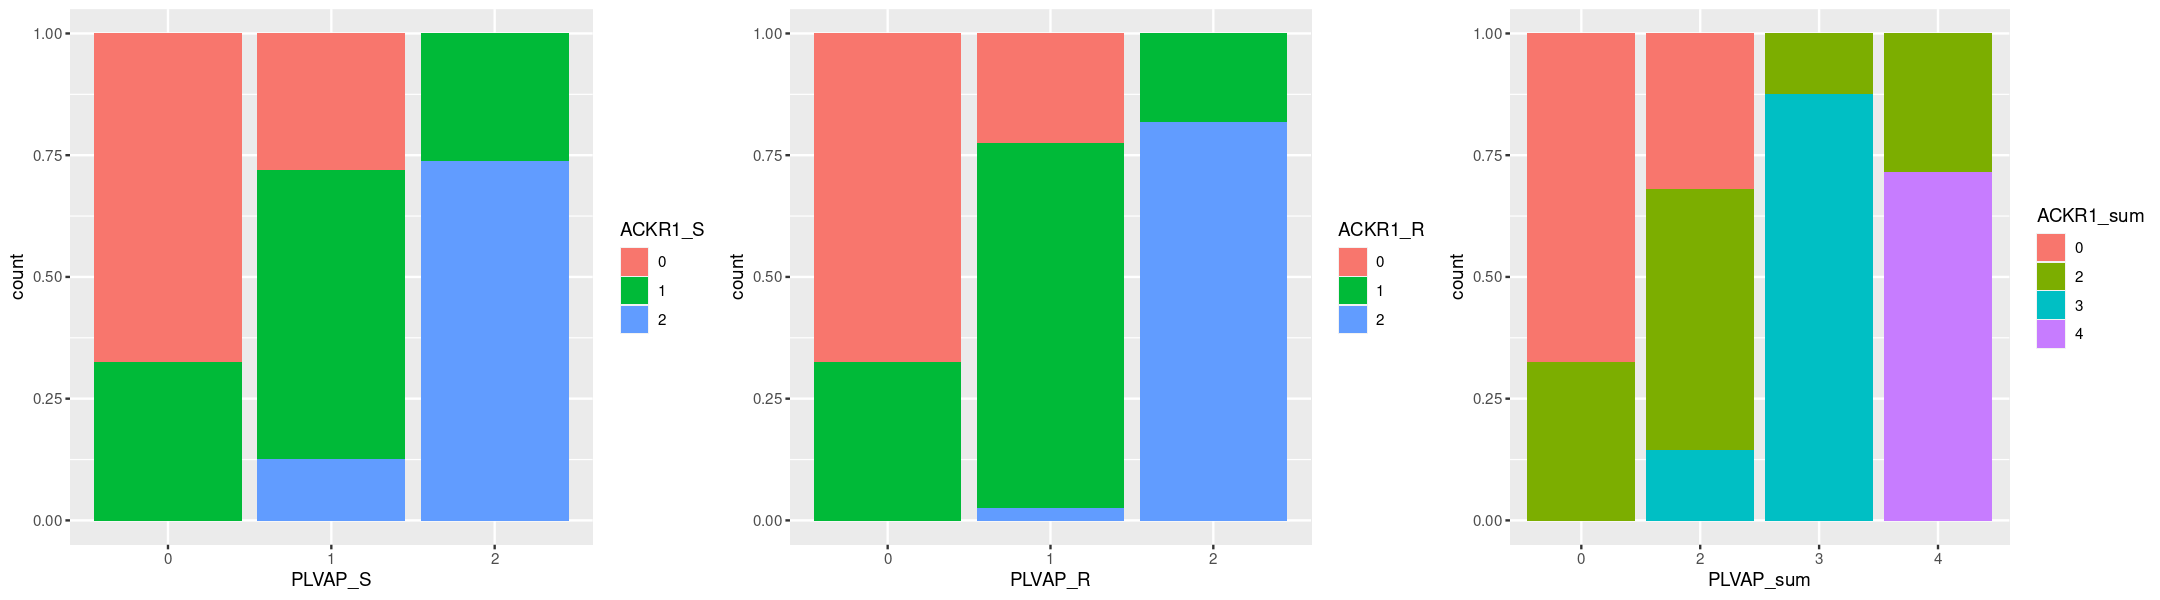

In [25]:
p1 <- ggplot(data=d_join_5) + 
geom_bar(
    mapping = aes(x = PLVAP_S, fill = ACKR1_S), 
    position= "fill"
    )

p2 <- ggplot(data=d_join_5) + 
geom_bar(
    mapping = aes(x = PLVAP_R, fill = ACKR1_R), 
    position= "fill"
    )

p3 <- ggplot(data=d_join_5) + 
geom_bar(
    mapping = aes(x = PLVAP_sum, fill = ACKR1_sum), 
    position= "fill"
    )

grid.arrange(p1, p2, p3, ncol=3)

In [26]:
d_join_3 <- d_join_3 %>% mutate(PLVAP_Snum = as.numeric(as.character(PLVAP_S))) %>% mutate(PLVAP_Rnum = as.numeric(as.character(PLVAP_R))) %>% mutate(PLVAP_sumnum = as.numeric(as.character(PLVAP_sum))) %>%
mutate(ACKR1_Snum = as.numeric(as.character(ACKR1_S))) %>% mutate(ACKR1_Rnum = as.numeric(as.character(ACKR1_R))) %>% mutate(ACKR1_sumnum = as.numeric(as.character(ACKR1_sum)))


In [27]:
cor.test(d_join_3$PLVAP_Snum, d_join_3$ACKR1_Snum, method = c("spearman"), use = "complete.obs")
cor.test(d_join_3$PLVAP_Rnum, d_join_3$ACKR1_Rnum, method = c("spearman"), use = "complete.obs")
cor.test(d_join_3$PLVAP_sumnum, d_join_3$ACKR1_sumnum, method = c("spearman"), use = "complete.obs")


Warning message in cor.test.default(d_join_3$PLVAP_Snum, d_join_3$ACKR1_Snum, method = c("spearman"), :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  d_join_3$PLVAP_Snum and d_join_3$ACKR1_Snum
S = 36265, p-value = 2.975e-13
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6806603 


Warning message in cor.test.default(d_join_3$PLVAP_Rnum, d_join_3$ACKR1_Rnum, method = c("spearman"), :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  d_join_3$PLVAP_Rnum and d_join_3$ACKR1_Rnum
S = 40637, p-value = 1.55e-11
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6421648 


Warning message in cor.test.default(d_join_3$PLVAP_sumnum, d_join_3$ACKR1_sumnum, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  d_join_3$PLVAP_sumnum and d_join_3$ACKR1_sumnum
S = 31193, p-value = 1.327e-15
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.725329 


# Other marker

In [28]:
d_join_6 <- d_join_3 %>% select(-c(PLVAP_S, PLVAP_R,ACKR1_S, ACKR1_R,  CCL14_S, CCL14_R, PLVAP_sum, ACKR1_sum, CCL14_sum,
                                  PLVAP_Snum,PLVAP_Rnum, PLVAP_sumnum, ACKR1_Snum, ACKR1_Rnum, ACKR1_sumnum ))

In [29]:
d_join_7 <- d_join_6 %>% drop_na()

In [30]:
mytable(P_Fib3~CCL14.Hscore.endothelial.cells+CCL14.Hscore.cardiomyocytes+SLC6A6.Hscore.cardiomyocytes+RRAD.Hscore.cardiomyocytes
       +IGF2BP2.Hscore.cardiomyocytes+UCHL1.Hscore.cardiomyocytes+MYOM1.Hscore.cardiomyocytes, data=d_join_7)


                     Descriptive Statistics by 'P_Fib3'                    
____________________________________________________________________________ 
                                     0            1            2         p  
                                   (N=53)       (N=26)       (N=6)    
---------------------------------------------------------------------------- 
 CCL14.Hscore.endothelial.cells  7.7 ± 16.2  49.6 ± 83.5  77.5 ± 70.0  0.000
 CCL14.Hscore.cardiomyocytes     3.5 ± 24.7  13.1 ± 43.8   0.8 ±  2.0  0.398
 SLC6A6.Hscore.cardiomyocytes   72.1 ± 41.6  81.9 ± 33.6  90.5 ± 42.4  0.389
 RRAD.Hscore.cardiomyocytes     73.5 ± 76.4  103.5 ± 74.7 89.3 ± 59.0  0.250
 IGF2BP2.Hscore.cardiomyocytes  26.8 ± 37.7  28.7 ± 41.7   5.0 ±  4.5  0.374
 UCHL1.Hscore.cardiomyocytes    41.7 ± 45.7  72.0 ± 56.0  147.8 ± 75.5 0.000
 MYOM1.Hscore.cardiomyocytes    106.1 ± 62.2 130.0 ± 70.1 114.2 ± 23.3 0.291
---------------------------------------------------------------------------- 

In [31]:
mytable(P_Deg3~CCL14.Hscore.endothelial.cells+CCL14.Hscore.cardiomyocytes+SLC6A6.Hscore.cardiomyocytes+RRAD.Hscore.cardiomyocytes
       +IGF2BP2.Hscore.cardiomyocytes+UCHL1.Hscore.cardiomyocytes+MYOM1.Hscore.cardiomyocytes, data=d_join_7)


                    Descriptive Statistics by 'P_Deg3'                    
___________________________________________________________________________ 
                                     0           1            2         p  
                                  (N=27)       (N=39)       (N=19)   
--------------------------------------------------------------------------- 
 CCL14.Hscore.endothelial.cells  6.7 ± 17.7 21.1 ± 49.4  60.8 ± 83.6  0.003
 CCL14.Hscore.cardiomyocytes     0.1 ±  0.6  8.7 ± 36.1   9.8 ± 41.2  0.468
 SLC6A6.Hscore.cardiomyocytes   68.7 ± 38.8 76.9 ± 40.1  86.2 ± 38.3  0.336
 RRAD.Hscore.cardiomyocytes     60.4 ± 80.9 92.2 ± 69.4  99.8 ± 74.8  0.138
 IGF2BP2.Hscore.cardiomyocytes  15.9 ± 22.3 34.9 ± 44.8  21.1 ± 37.1  0.109
 UCHL1.Hscore.cardiomyocytes    30.3 ± 35.6 54.6 ± 53.2  106.3 ± 65.5 0.000
 MYOM1.Hscore.cardiomyocytes    85.6 ± 51.8 129.7 ± 66.5 122.0 ± 60.7 0.015
--------------------------------------------------------------------------- 

In [32]:
d_join_7_ESvsCtrlHis <- d_join_7[d_join_7$ClinicalNHist_Control2=="Control_His"|d_join_7$ClinicalNHist_Control2=="Diseased_ES",]

In [33]:
d_join_7_ESvsCtrlHis <- d_join_7_ESvsCtrlHis %>% mutate(ClinicalNHist_Control2=as.character(ClinicalNHist_Control2))

In [34]:
mytable(ClinicalNHist_Control2~SLC6A6.Hscore.cardiomyocytes+RRAD.Hscore.cardiomyocytes
       +IGF2BP2.Hscore.cardiomyocytes+UCHL1.Hscore.cardiomyocytes+MYOM1.Hscore.cardiomyocytes,
        
        data=d_join_7_ESvsCtrlHis)


     Descriptive Statistics by 'ClinicalNHist_Control2'     
_____________________________________________________________ 
                               Control_His Diseased_ES    p  
                                 (N=13)       (N=43)   
------------------------------------------------------------- 
 SLC6A6.Hscore.cardiomyocytes  54.6 ± 39.0 77.1 ± 41.9  0.090
 RRAD.Hscore.cardiomyocytes    36.2 ± 41.5 92.0 ± 74.7  0.001
 IGF2BP2.Hscore.cardiomyocytes  3.8 ±  8.9 22.2 ± 35.3  0.003
 UCHL1.Hscore.cardiomyocytes   17.2 ± 24.9 69.3 ± 64.5  0.000
 MYOM1.Hscore.cardiomyocytes   66.5 ± 43.6 121.7 ± 62.4 0.004
------------------------------------------------------------- 

In [35]:
sessionInfo()

R version 4.0.0 (2020-04-24)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS:   /opt/applications/R/4.0.0/gnu/lib64/R/lib/libRblas.so
LAPACK: /opt/applications/R/4.0.0/gnu/lib64/R/lib/libRlapack.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] gridExtra_2.3   moonBook_0.2.4  lubridate_1.9.2 forcats_1.0.0  
 [5] stringr_1.5.0   dplyr_1.1.0     purrr_1.0.1     readr_2.1.4    
 [9] tidyr_1.3.0     tibble_3.2.0    ggplot2_3.4.1   tidyverse_2.0.0

loaded via a namespace (and not a